# Algorithm Outline/Plan
### practice work on the algorithm

In [28]:
import numpy as np
import heartpy as hp
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [9]:
# Loading the datasets
mat = scipy.io.loadmat(r"C:\Users\nitar\OneDrive - Virginia Tech\BMES 4015\Example ML Algorithms from Lit Reviews\T2TGAN - data\part_1.mat")

In [10]:
records = [record for record in mat['p'][0]]

'''
for each record:
3 types
r[0][i]

The sampling frequency (fs) is the number of samples per second:
1: PPG signal, FS=125Hz; photoplethysmograph from fingertip
2: ABP signal, FS=125Hz; invasive arterial blood pressure (mmHg)
3: ECG signal, FS=125Hz; electrocardiogram from channel II

Ex for records[0][i]: 125 samples/sec ; 61000 samples = 488 sec or ~8 min
'''
#print(len(records[i][j]))

'\nfor each record:\n3 types\nr[0][i]\n\nThe sampling frequency (fs) is the number of samples per second:\n1: PPG signal, FS=125Hz; photoplethysmograph from fingertip\n2: ABP signal, FS=125Hz; invasive arterial blood pressure (mmHg)\n3: ECG signal, FS=125Hz; electrocardiogram from channel II\n\nEx for records[0][i]: 125 samples/sec ; 61000 samples = 488 sec or ~8 min\n'

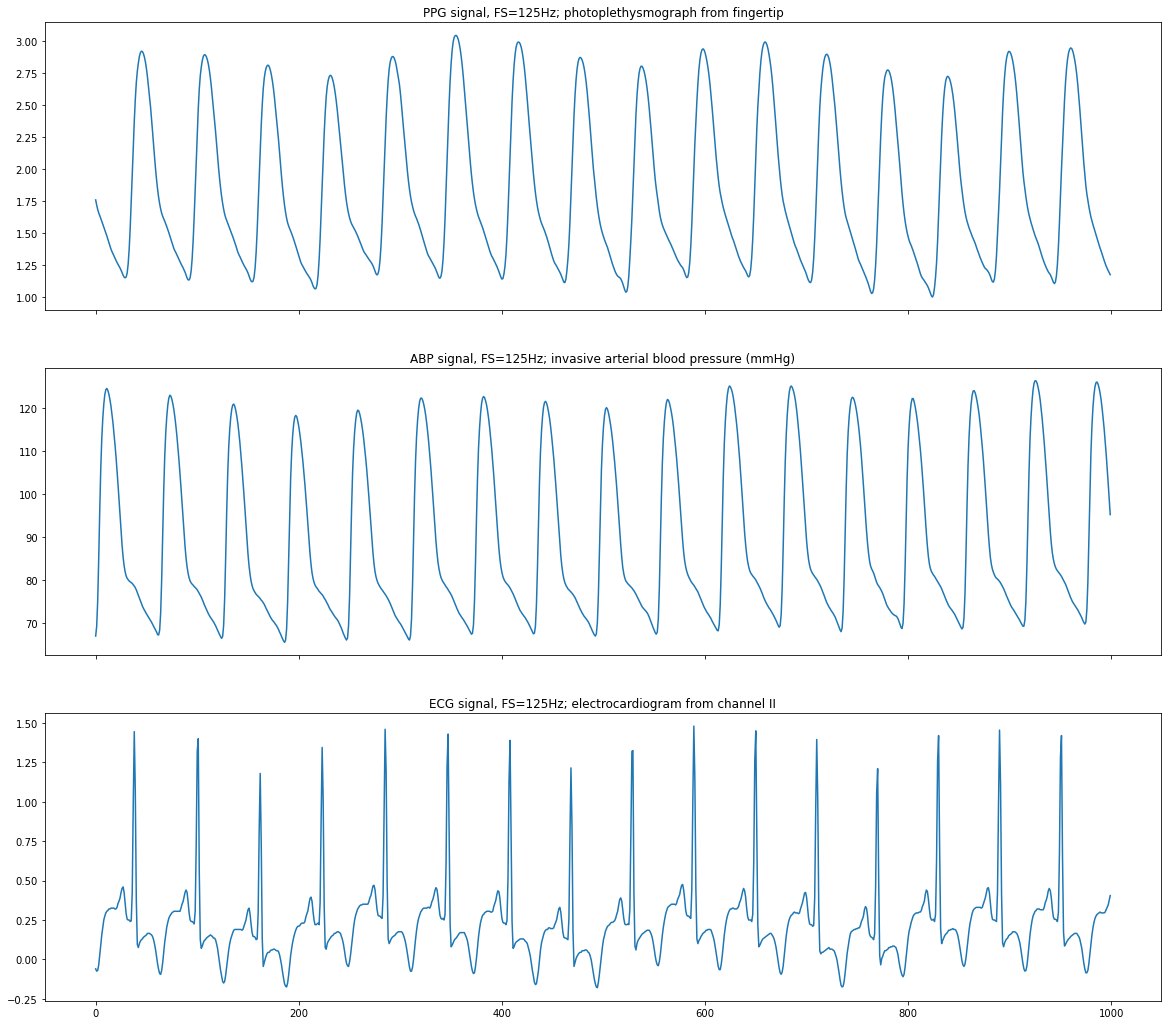

In [13]:
# Create three subplots 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharex=True,figsize=(20,18))
# plotting the first 8 seconds of the first record
ax1.plot(records[0][0][:1000])
ax1.title.set_text('PPG signal, FS=125Hz; photoplethysmograph from fingertip')
ax2.plot(records[0][1][:1000])
ax2.title.set_text('ABP signal, FS=125Hz; invasive arterial blood pressure (mmHg)')
ax3.plot(records[0][2][:1000])
ax3.title.set_text('ECG signal, FS=125Hz; electrocardiogram from channel II')

In [25]:
PPG = np.array(records[0][0])
ABP = np.array(records[0][1])
ECG = np.array(records[0][2])

## Data Preprocessing
### 1. Noise Removal
Fast Fourier Transform to convert from time domain into the frequency domain. Let x[n], 0<=n<= N-1, represent the PPG, and the FTT of x[n] is denoted as X[k], 0<=k<=N-1. The frquency components that are lower than 0 Hz or higher than 8 Hz are removed (to reduce noise and baseline wandering) by the following:  Xr[k] = X[k] where k>= 8; 0 otherwise <br/>
Inverse FFT (IFFT) restored the PPG data to the time domain

In [ ]:
# The data above has already been processed, so we are skipping this step for now.

### 2. Normalization - 1st/2nd Derivative Calculations
Every segment is normalized (between [0 1] using x'=(x-Xm)/(XM-Xm) where x is the data point, Xm is the min, and XM is the max.<br/>
The 1st (dPPG) and 2nd (sdPPG) derivatives are then calculated.

In [47]:
# norm
PPG_norm = preprocessing.normalize(records[0][0].reshape(1,-1))
PPG_norm = PPG_norm[0]

# 1st derivative
PPG_d = np.gradient(PPG_norm)

# 2nd derivative
PPG_sd = np.gradient(PPG_d)

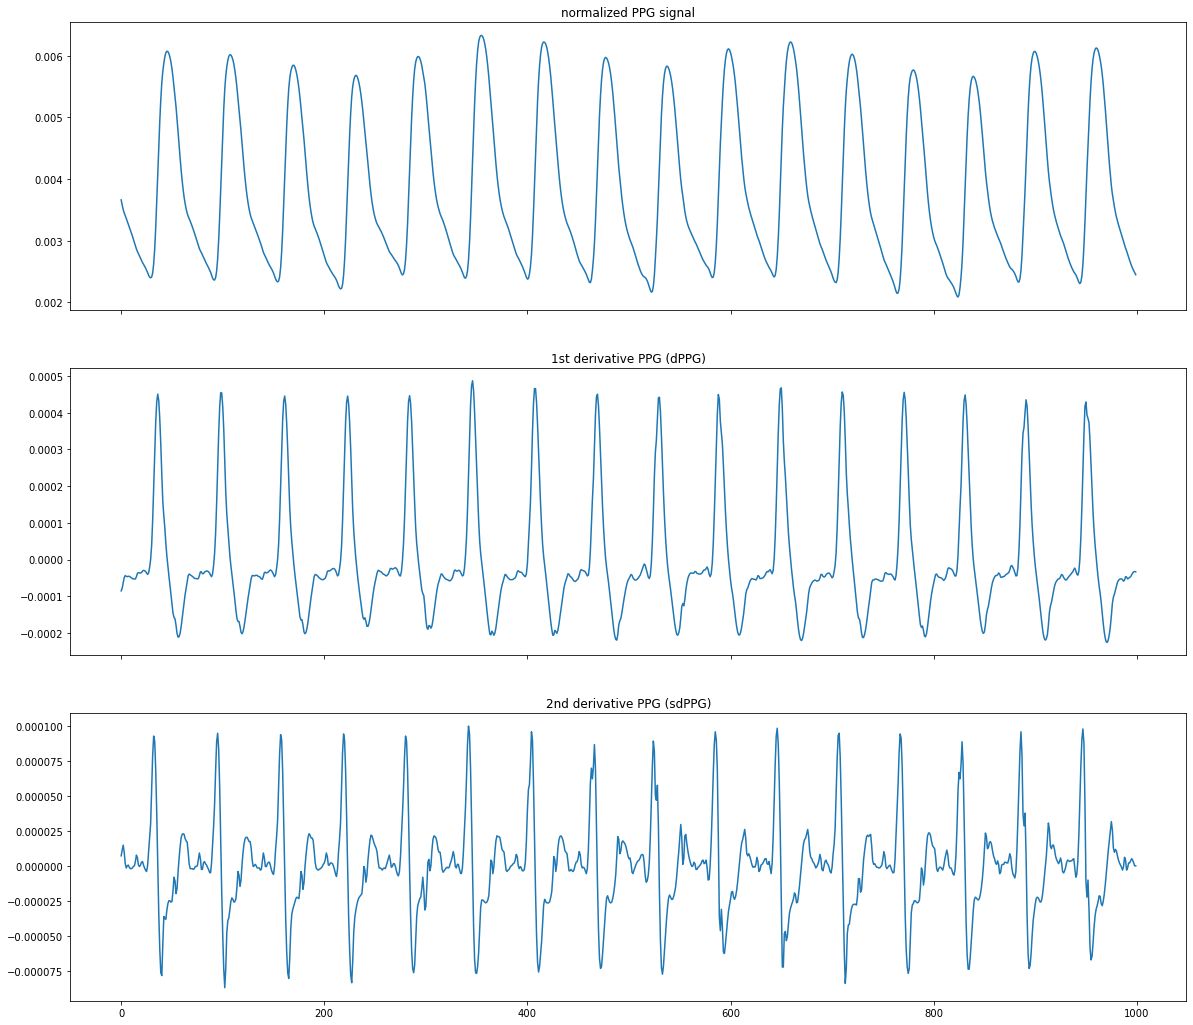

In [51]:
# Create three subplots 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharex=True,figsize=(20,18))
# plotting the first 8 seconds of the first record
ax1.plot(PPG_norm[:1000])
ax1.title.set_text('normalized PPG signal')
ax2.plot(PPG_d[:1000])
ax2.title.set_text('1st derivative PPG (dPPG)')
ax3.plot(PPG_sd[:1000])
ax3.title.set_text('2nd derivative PPG (sdPPG)')

### 3. Feature Point Detection
https://github.com/paulvangentcom/heartrate_analysis_python
<br/>The following points should be labeled/extracted from the PPG/dPPG/sdPPG:<br/>
    a. systolic peaks of PPG<br/>
    b. onset and offset valley points of PPG by finding the min between 2 consecutive systolic peaks<br/>
    c. locations with maximal and minimal slope values of PPG and dPPG by computing the gradients of the valley points<br/>
    d. dicrotic notch points from secondary peaks of sdPPG contour

C:\Users\nitar\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nitar\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nitar\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nitar\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\nitar\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: M

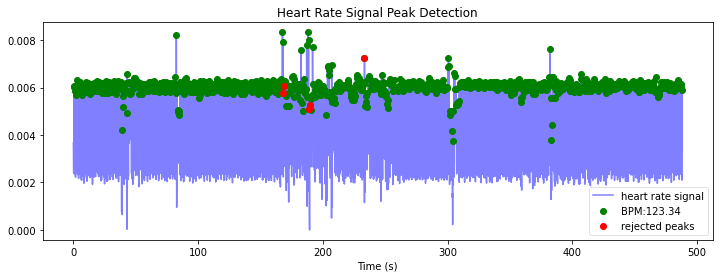

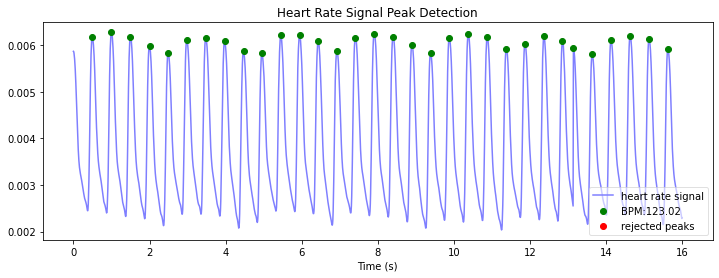

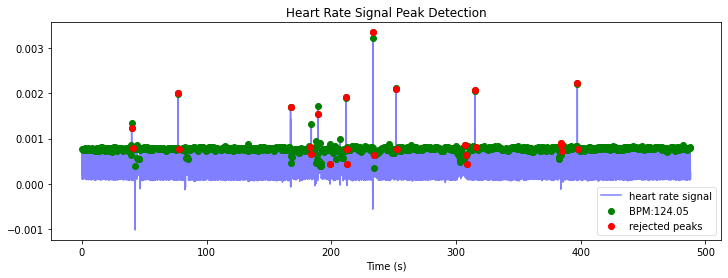

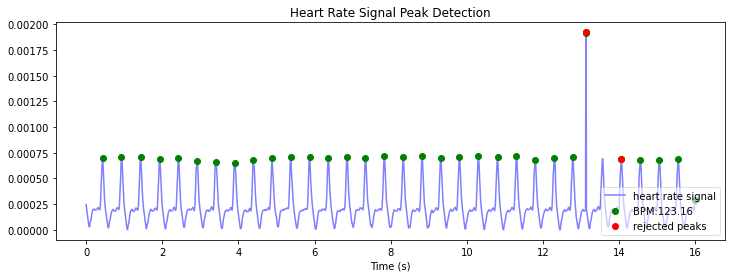

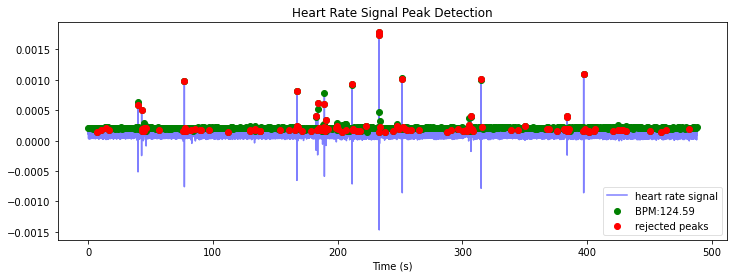

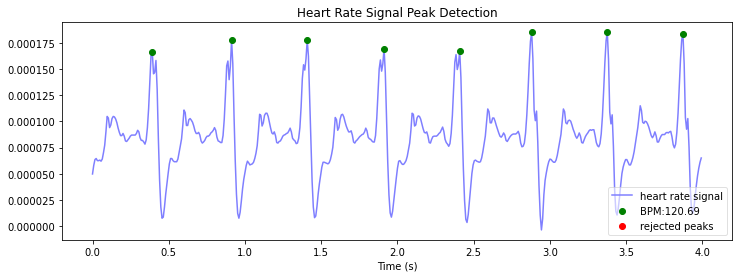

In [175]:
# running the PPG peak detection analysis 
wd1, m1 = hp.process(PPG_norm, sample_rate = 125) # full array
hp.visualizeutils.plotter(wd1, m1, figsize=(12,4))
wd2, m2 = hp.process(PPG_norm[8000:10000], sample_rate = 125) # full array
hp.visualizeutils.plotter(wd2, m2, figsize=(12,4))
wd_d1, m_d1 = hp.process(PPG_d, sample_rate = 125) # full array
hp.visualizeutils.plotter(wd_d1, m_d1, figsize=(12,4))
wd_d2, m_d2 = hp.process(PPG_d[8000:10000], sample_rate = 125) # full array
hp.visualizeutils.plotter(wd_d2, m_d2, figsize=(12,4))
wd_sd1, m_sd1 = hp.process(PPG_sd, sample_rate = 125) # full array
hp.visualizeutils.plotter(wd_sd1, m_sd1, figsize=(12,4))
wd_sd2, m_sd2 = hp.process(PPG_sd[8000:9000], sample_rate = 125) # full array
hp.visualizeutils.plotter(wd_sd2, m_sd2, figsize=(12,4))

In [ ]:
'''
Tuple: (([systolic_peak_idx],[systolic_peak]),
        ([valley_point_idx],[valley_point]),
        ([slopeval_ppg_idx],[slopeval_ppg]),
        ([slopeval_dppg_idx],[slopeval_dppg]),
        ([dicrotic_notch_idx],[dicrotic_notch]))
Indexing rules - data[i][j][k]
where i = data type, j = 0 (index) or 1 (value), and k is in range(len(data type)).
       
       
Dict: {
systolic_peak  : {vals: [],
                  ids": []},
valley_point   : {vals: [],
                  ids": []},
slopeval_ppg   : {vals: [],
                  ids": []}, 
slopeval_dppg  : {vals: [],
                  ids": []},
dicrotic_notch : {vals: [],
                  ids": []}                
}

'''

In [95]:
# (a) systolic peaks
systolic_peak_idx = wd1['peaklist'] # array of peak indices
systolic_peak = wd1['ybeat'] # array of peak values

In [156]:
# (b) valley points
valley_point_idx = [] # array of valley point indices
valley_point = [] # array of valley point values
for i in range(len(systolic_peak)-1):
    p1 = systolic_peak_idx[i] # index of 1st peak
    p2 = systolic_peak_idx[i+1] # index of 2nd peak
    ptp = PPG_norm[p1:p2]
    min_val = min(ptp)
    valley_point.append(min_val)
    min_idx = np.where(ptp == min_val) + p1
    valley_point_idx.append(min_idx[0][0].tolist())

In [169]:
# (c) max/min slope values 
slopeval_ppg = [PPG_norm[i] for i in wd_d1['peaklist']]
slopeval_ppg_idx = wd_d1['peaklist']
slopeval_dppg = [PPG_d[i] for i in wd_sd1['peaklist']]
slopeval_dppg_idx = wd_sd1['peaklist']

In [238]:
# (d) dicrotic notch points
dicrotic_notch_idx = scipy.signal.find_peaks(PPG_sd,height=(0.00002,0.000035),distance=40)[0]
dicrotic_notch = [PPG_norm[i] for i in dicrotic_notch_idx]

In [ ]:
## Creating a tuple of the variables
data = ()
data[0][0] = systolic_peak_idx
data[0][1] = systolic_peak
data[1][0] = valley_point_idx
data[1][1] = valley_point
data[2][0] = slopeval_ppg_idx
data[2][1] = slopeval_ppg
data[3][0] = slopeval_dppg_idx
data[3][1] = slopeval_dppg
data[4][0] = dicrotic_notch_idx
data[4][1] = dicrotic_notch

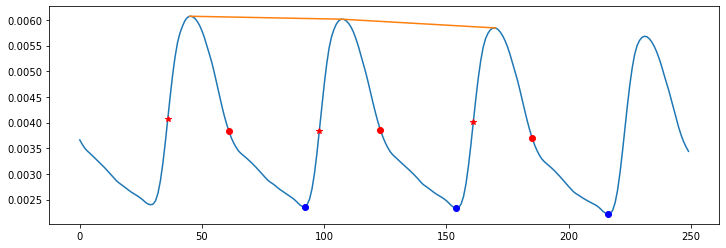

In [246]:
##EXAMPLES FOR HELP
plt.plot(PPG_norm[:250])
plt.plot(systolic_peak_idx[:3],systolic_peak[:3])
plt.plot(valley_point_idx[:3],valley_point[:3],'bo')
plt.plot(slopeval_ppg_idx[:3],slopeval_ppg[:3],'r*')
plt.plot(dicrotic_notch_idx[:3],dicrotic_notch[:3],'ro')

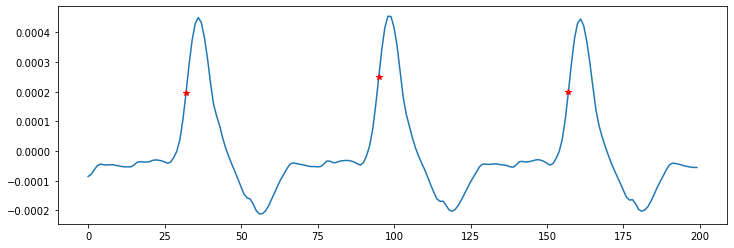

In [247]:
plt.plot(PPG_d[:200])
plt.plot(slopeval_dppg_idx[0:3],slopeval_dppg[0:3],'r*')

### 4. Data Partitioning
Each PPG data segment and its corresponding dPPG and sdPPG waves are partitioned into fragements by reserving each PPG data segment from one valley point of the PPG to the next consecutive valley point.<br/>
At this point, abnormal heart cycle may also be removed

In [ ]:
'''
Tuple: ((sample_idx,((systolic_peak_idx, systolic_peak),
                     (onset_valley_point_idx, onset_valley_point),
                     (offset_valley_point_idx, offset_valley_point),
                     (slopeval_ppg_idx, slopeval_ppg),
                     (slopeval_dppg_idx, slopeval_dppg),
                     (dicrotic_notch_idx, dicrotic_notch)
                     )
        ))
Indexing rules - data[i][j][k][l]
where i = sample #, j = 0 (sample_index) or 1 (features), k is in range(0:5) iff j=1, and l = 0 (feature_idx) or 1 (feature_val).

~~ OR ~~

Add all values to pandas dataframe where each variable is in a column
- more organization; easier visualization
- harder to manipulate and higher cost
'''

## Feature Extraction - Variables & Equations
### ECG Features
QRS_time:  Time for a full QRS wave (ECG)
<br/> RP_time:   Time from P peak to R peak (ECG)
<br/> RT_time:   Time from R peak to T peak (ECG)
<br/> PQ_time:   Time from P peak to Q peak (ECG)
<br/> ST_time:   Time from S peak to T peak (ECG)
<br/> PT_time:   Time from P peak to T peak (ECG)
<br/> P_amp:     P peak amplitude
<br/> R_amp:     R peak amplitude
<br/> T_amp:     T peak amplitude
<br/> RT_ratio:  T_amp/R_amp
<br/> RP_diff:   R_amp - P_amp
<br/> PTT_p:     Time from R peak of ECG to systolic peak of PPG
<br/> PTT_d:     Time from R peak of ECG to max slope point of PPG (dPPG)
<br/> PTT_f:     Time from R peak of ECG to foot of PPG signal

### PPG Features
HR:        Heart Rate (Peak-to-Peak time --> BPM)
<br/> AS:        Ascending slope of PPG (slope from onset point to max peak)
<br/> DS:        Descending slope of PPG (slope from max peak to offset point)
<br/> S1:        Area under curve between onset and max slope point
<br/> S2:        Area under curve between max slope point and max peak
<br/> S3:        Area under curve between max peak and dicrotic notch
<br/> S4:        Area under curve between dicrotic notch and offset point
<br/> AA:        Ascending area of PPG
<br/> DA:        Descending area of PPG
<br/> dAA:       Ascending area of dPPG
<br/> dDA:       Descending area of dPPG
<br/> sdAA:      Ascending area of sdPPG
<br/> sdDA:      Descending area of sdPPG
<br/> PI:        Peak intensity of PPG
<br/> dPI:       Peak intensity of dPPG
<br/> sdPI:      Peak intensity of sdPPG
<br/> dVI:       Valley intensity of dPPG
<br/> sdVI:      Valley intensity of sdPPG
<br/> AID:       Intensity diff between max peak and onset point (PPG)
<br/> dAID:      Intensity diff between max peak and onset point (dPPG)
<br/> sdAID:     Intensity diff between max peak and onset point (sdPPG)
<br/> dDID:      Intensity diff between offset point and max peak (dPPG)
<br/> sdDID:     Intensity diff between offset point and max peak (sdPPG)
<br/> dRIPV:     Ratio of max peak to valley intensity (dPPG)
<br/> sdRIPV:    Ratio of max peak to valley intensity (sdPPG)
<br/> AT:        Ascending time interval of PPG
<br/> Slope_a:   Slope from max peak to dicrotic notch of PPG
<br/> NI:        Dicrotic notch intensity
<br/> AI:        Augmentation index = NI/PI
<br/> AI1:       Augmentation index 1 = (PI-NI)/PI
<br/> RSD:       Ratio of systolic to diastolic duration
<br/> RSC:       Ratio of diastolic duration to cardiac cycle
<br/> RDC:       Ratio of systolic duaration to cardiac cycle
<br/> Other features to include: Gender, Weight, Age, Activity, etc. 